<a href="https://colab.research.google.com/github/gujarkushal256/gujarKushal/blob/main/ImageRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from tensorflow.keras import datasets,layers,models


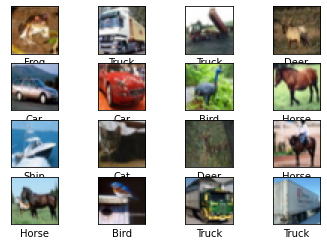

In [31]:
(training_images,training_labels),(testing_images,testing_labels)=datasets.cifar10.load_data()
training_images,testing_images=training_images/255,testing_images/255

class_names=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.show()



In [32]:
# For saving time we reduce the number of trainig and testing models[examples]. 
#As our computer is slow but it decreases the accuracy of the nueral network.
training_images=training_images[:20000]
training_labels=training_labels[:20000]
testing_images=testing_images[:4000]
testing_labels=testing_labels[:4000]

In [33]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))
model.fit(x=training_images,y=training_labels,epochs=10,validation_data=(testing_images,testing_labels))

Epoch 1/10
625/625 [==============================] - 35s 56ms/step - loss: 1.7603 - accuracy: 0.3491 - val_loss: 1.5343 - val_accuracy: 0.4395
Epoch 2/10
625/625 [==============================] - 30s 48ms/step - loss: 1.3929 - accuracy: 0.4975 - val_loss: 1.3804 - val_accuracy: 0.4958
Epoch 3/10
625/625 [==============================] - 31s 49ms/step - loss: 1.2558 - accuracy: 0.5521 - val_loss: 1.1978 - val_accuracy: 0.5730
Epoch 4/10
625/625 [==============================] - 30s 47ms/step - loss: 1.1372 - accuracy: 0.6004 - val_loss: 1.2232 - val_accuracy: 0.5750
Epoch 5/10
625/625 [==============================] - 29s 47ms/step - loss: 1.0508 - accuracy: 0.6335 - val_loss: 1.0970 - val_accuracy: 0.6055
Epoch 6/10
625/625 [==============================] - 29s 47ms/step - loss: 0.9778 - accuracy: 0.6550 - val_loss: 1.0879 - val_accuracy: 0.6055
Epoch 7/10
625/625 [==============================] - 29s 47ms/step - loss: 0.9283 - accuracy: 0.6733 - val_loss: 1.0522 - val_accuracy:

In [35]:
loss,accuracy=model.evaluate(testing_images,testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

125/125 [==============================] - 2s 14ms/step - loss: 1.0308 - accuracy: 0.6535
Loss: 1.0308116674423218
Accuracy: 0.6535000205039978


In [36]:
model.save('imageRecognizer.model')

In [38]:
# Now we Do not have run the traninig model every time we have loaded the saved the model.
model=models.load_model('imageRecognizer.model')

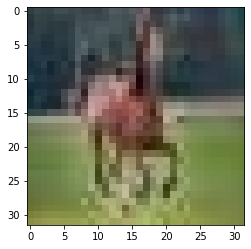

In [40]:
img=cv.imread('/content/horse (1).jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)

In [41]:
prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(f"Prediction is {class_names[index]}")

Prediction is Horse


Prediction is Deer


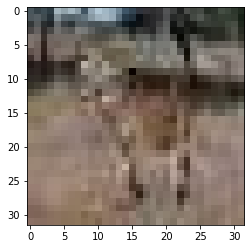

In [42]:
img=cv.imread('/content/deer (1).jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(f"Prediction is {class_names[index]}")

Prediction is Plane


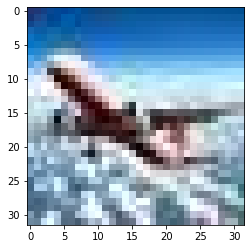

In [43]:
img=cv.imread('/content/plane (1).jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(f"Prediction is {class_names[index]}")

Prediction is Car


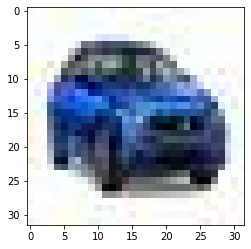

In [44]:
img=cv.imread('/content/car (1).jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(f"Prediction is {class_names[index]}")